## 6.5 Machine Learning Part 2 

 ## Contenet. 
 #### 1. Importing libraries and data and rearranging columns
 #### 2. The elbow technique
 #### 3. k-means clustering
 #### 4. Observations
 #### 5. Descriptive statistics

### 1. Importing libraries and data and rearranging columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/arunibandara/Documents/Achievenemt 6.1'

In [4]:
path

'/Users/arunibandara/Documents/Achievenemt 6.1'

In [5]:
# Import the RenE_c2_wn dataset

df_RE= pd.read_csv(os.path.join(path, '02 Data','prepared_data', 'RenE_c2_wn2.csv'))

In [6]:
df_RE.shape

(5040, 11)

In [7]:
df_RE.head()

,Country Name,Time,Access_Electracity(%)-Rural_P,Access_Electracity(%)-Urban_P,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),Total_Electracity_output(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ),Total_final_E_consumption(TFEC),Renewable_E/TFEC(%)
0,Afghanistan,1996,0.0,62.652660,0.010000,475.0,675.0,70.370370,9304.887,24521.55410,37.945748
1,Afghanistan,1997,0.0,64.409889,0.010000,485.0,670.0,72.388060,9861.213,23800.61303,41.432601
2,Afghanistan,1998,0.0,66.160934,0.021977,495.0,665.0,74.436090,10254.290,23255.34464,44.094337
3,Afghanistan,1999,0.0,67.904762,0.179635,505.0,685.0,73.722628,10765.990,20630.12407,52.185774
4,Afghanistan,2000,0.0,69.640984,0.959756,515.7,687.7,74.989094,11301.390,20834.69512,54.243126


In [8]:
# Removing unwated columns and renaming

df_RE.drop(['Country Name', 'Time', 'Access_Electracity(%)-Rural_P', 'Access_Electracity(%)-Urban_P', 'Total_Electracity_output(gwh)', 'Total_final_E_consumption(TFEC)', 'Renewable_E/TFEC(%)'], axis = 1, inplace = True)


In [9]:
df_RE.head(5)

,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ)
0,0.010000,475.0,70.370370,9304.887
1,0.010000,485.0,72.388060,9861.213
2,0.021977,495.0,74.436090,10254.290
3,0.179635,505.0,73.722628,10765.990
4,0.959756,515.7,74.989094,11301.390


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_RE).score(df_RE) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3286149281491532.0,
 -778303983665433.0,
 -296244680475113.6,
 -175160213241770.62,
 -116177205616158.84,
 -83729217170829.53,
 -60051384710497.44,
 -47250897660711.695,
 -39604484984616.17]

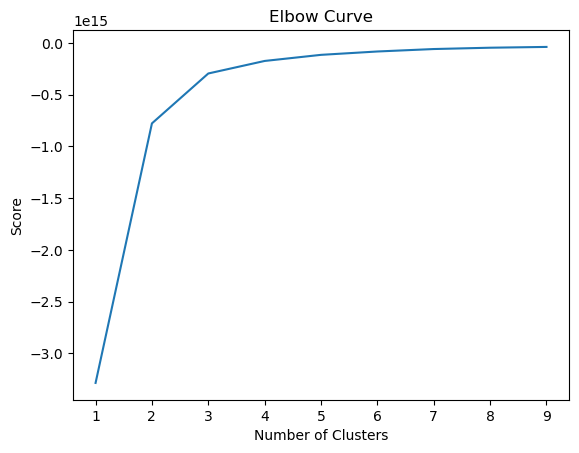

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There is a large jump from 2 to 3 on the x-axis, but after that, the curve straightens. This means that the optimal count for your clusters is 3.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_RE)

KMeans(n_clusters=3)

In [15]:
# Create a new column in the dataframe with values corresponding to which cluster every observation belongs

df_RE['clusters'] = kmeans.fit_predict(df_RE)

In [16]:
df_RE.head(10)

,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ),clusters
0,0.010000,475.0,70.370370,9304.887,0
1,0.010000,485.0,72.388060,9861.213,0
2,0.021977,495.0,74.436090,10254.290,0
3,0.179635,505.0,73.722628,10765.990,0
4,0.959756,515.7,74.989094,11301.390,0
5,0.776537,503.2,72.811460,11510.280,0
6,6.267394,571.0,79.063971,11997.100,0
7,11.751966,647.0,70.249729,12635.100,0
8,17.236319,565.0,70.890841,12869.720,0
9,23.000000,671.0,74.061810,13245.710,0


In [17]:
df_RE['clusters'].value_counts()

0    4892
2     107
1      41
Name: clusters, dtype: int64

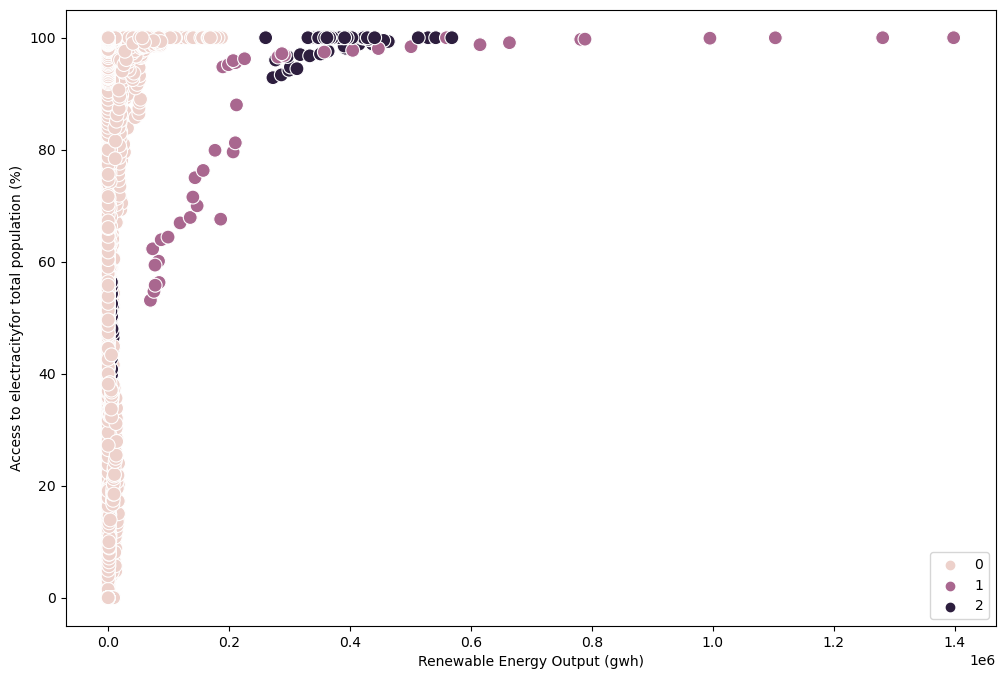

In [18]:
# Plot the clusters for the "Access_Electracity(%)-Total_P" and "RenewableEOutput(gwh)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_RE['RenewableEOutput(gwh)'], y=df_RE['Access_Electracity(%)-Total_P'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Renewable Energy Output (gwh)') # Label x-axis.
plt.ylabel('Access to electracityfor total population (%)') # Label y-axis.
plt.show()

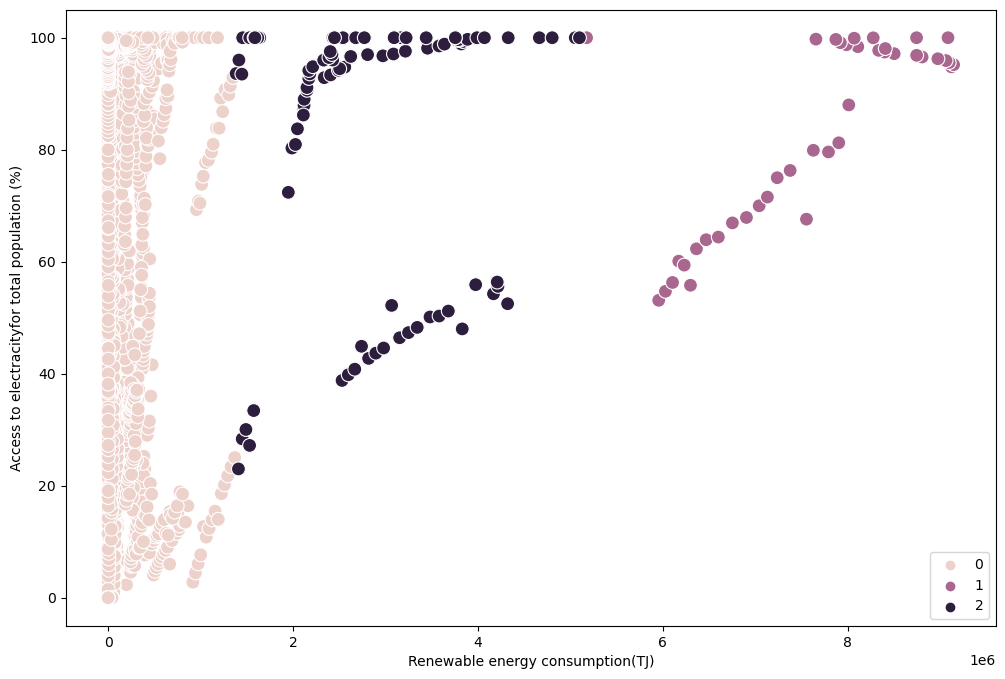

In [19]:
# Plot the clusters for the "RenewableE_consumption(TJ)" and "Access to electracityfor total population (%)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_RE['RenewableE_consumption(TJ)'], y=df_RE['Access_Electracity(%)-Total_P'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Renewable energy consumption(TJ)') 
plt.ylabel('Access to electracityfor total population (%)') 
plt.show()

### 4.Observations

#### For the 1st plot, purple (cluster 1) and dark purple (cluster 2) has performed well.

The plot 'Renewable Energy Output (GWh) Vs Access to electricity for the total population (%)' has divided clusters quite well but it shows that with no 'Renewable energy output', the access to electricity for the total population (%) ' is higher but when it increases the Renewable energy output, the coverage of Access to electricity for the total population (%) also moderately increases as well showing a relationship with each other. It could mean that the Renewable energy output is not the only impactful factor for electricity coverage but other types of electricity output need to be considered as well.

#### For the 2nd plot, all the clusteres performed well.

The plot 'Renewable Energy Consumption(TJ) Vs Access to electricity for the total population (%)' also divides the clusters way better than the above graph. when the Renewable Energy Consumption(TJ)increases access to electricity the total population percentage is decreasing. This means that Renewable energy consumption impacts electricity coverage for the total population.


### 5. Descriptive statistics

In [20]:
df_RE.loc[df_RE['clusters'] == 2, 'cluster'] = 'dark purple'
df_RE.loc[df_RE['clusters'] == 1, 'cluster'] = 'purple'
df_RE.loc[df_RE['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df_RE.groupby('cluster').agg({'Access_Electracity(%)-Total_P':['mean', 'median'], 
                         'RenewableEOutput(gwh)':['mean', 'median'], 
                         'RenewableE/TotalE(%)':['mean', 'median'],
                          'RenewableE_consumption(TJ)':['mean', 'median']})

Access_Electracity(%)-Total_P            RenewableEOutput(gwh)  \
                                     mean     median                  mean   
cluster                                                                      
dark purple                     84.266834  96.765107         216177.327103   
pink                            69.170458  94.359447           7216.943285   
purple                          83.199189  94.791122         350007.658537   

                         RenewableE/TotalE(%)             \
                  median                 mean     median   
cluster                                                    
dark purple  298979.0000            42.775552  33.400618   
pink            179.8065            24.692512   6.409923   
purple       206838.0000            16.703256  16.619018   

            RenewableE_consumption(TJ)               
                                  mean       median  
cluster                                              
dark purple               2.664959e+06  2491751.000  
pink                      8.557079e+04    12936.285  
purple                    7.635080e+06  7871450.000

### 6. Next step

#### When considering k-mean clustering plots it is simple to draw an insight from large data sets so it generalizes the data points into clusters of different shapes and sizes and gives an idea rather than a linear plot or curve. So it gives a way to find the relationship between the variables used and how each is impactful, further prioritizing the variables according to impact. but when it comes to time and categorical variables there is no way to indicate it. 
 